In [1]:
import pandas as pd

import os
import shutil

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

import glob

In [2]:
excel_sheet = glob.glob('*.xlsx')

In [3]:
excel_sheet

['structures__.xlsx']

In [4]:
sheets = pd.ExcelFile(excel_sheet[0]).sheet_names
print(sheets)

['pub_1', 'pub_2', 'pub_3']


In [5]:
test = True
if test == True:
    sheets = ['pub_1']
else:
    sheets = sheets

In [6]:
dat_list = ['data'+sheet for sheet in sheets]

In [7]:
for i, element in enumerate(sheets):
    dat_list[i] = pd.read_excel(excel_sheet[0], sheet_name=element)

In [8]:
dat_list[0]

,numer struktury,SMILES,Klasa
0,1,C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6...,publikacja_1
1,2,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5...,publikacja_1
2,3,[N-]=[N+]=NCC1=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)...,publikacja_1
3,4,[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=...,publikacja_1
4,5,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4...,publikacja_1


## Create directories

In [9]:
#to get the current working directory
directory = os.getcwd()
directory

'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU'

In [10]:
list_dir = []

for df in dat_list:
    df['destenation'] = 0
    
for collection in dat_list:
    for num in list(collection.index):
        if len(dat_list) > 1:
            
            os.mkdir(os.path.join(directory, str('lig'+str(num+1)+'_'+collection['Klasa'][num])))
            collection['destenation'][num] = os.path.join(directory, str('lig'+str(num+1)+'_'+collection['Klasa'][num]))
            list_dir.append(os.path.join(directory, str('lig'+str(num+1)+'_'+collection['Klasa'][num])))
            
        else:
            
            os.mkdir(os.path.join(directory, str('ligand'+str(num+1)+'_')))
            collection['destenation'][num] = os.path.join(directory, str('ligand'+str(num+1)+'_'))
            list_dir.append(os.path.join(directory, str('ligand'+str(num+1)+'_')))
            

C:\Users\aleks\AppData\Local\Temp\ipykernel_25884\409050264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collection['destenation'][num] = os.path.join(directory, str('ligand'+str(num+1)+'_'))
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
dat_list[0]

,numer struktury,SMILES,Klasa,destenation
0,1,C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6...,publikacja_1,C:\Users\aleks\Documents\GitHub\Molecular_dock...
1,2,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5...,publikacja_1,C:\Users\aleks\Documents\GitHub\Molecular_dock...
2,3,[N-]=[N+]=NCC1=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)...,publikacja_1,C:\Users\aleks\Documents\GitHub\Molecular_dock...
3,4,[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=...,publikacja_1,C:\Users\aleks\Documents\GitHub\Molecular_dock...
4,5,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4...,publikacja_1,C:\Users\aleks\Documents\GitHub\Molecular_dock...


In [12]:
dat_list[0]['destenation'][0]

'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand1_'

In [13]:
tmp_ = pd.DataFrame(data=list_dir, columns=['Name'])
tmp_.to_excel('to_be_moved_to.xlsx')
list_dir

['C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand1_',
 'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand2_',
 'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand3_',
 'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand4_',
 'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand5_']

## Create mol objects instead of SMILES

In [14]:
def create_PDB_from_SMILES_list(smiles_list):
    mols = []
    for smi in smiles_list:
        try:
            new = Chem.MolFromSmiles(smi)
            mols.append(new)
        except:
            print("Error:"+str(smi))
    mols_H = []
    for mol in mols:
        try:
            new_1 = Chem.AddHs(mol)
            new_2 = AllChem.EmbedMolecule(new_1, randomSeed=0xf00d)
            mols_H.append(new_1)
        except:
            print("Error:"+str(Chem.MolToSmiles(mol)))
    #files_creation
    for i in range(len(mols_H)):
        try:
            Chem.rdmolfiles.MolToPDBFile(mols_H[i], "3D_structure"+'_'+str(i+1)+str(smiles_list[i][0:5])+'.pdb')
        except:
            print("Something went wrong while creating PDB file...")
    return mols_H

In [15]:
def create_PDB_from_SMILES(smiles, initial_dir, destenation_dir, name):
    try:
        mol = Chem.MolFromSmiles(smiles)
    except:
        print("There is an error when preparing molecule: "+str(smiles))
        
    try:
        new_mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(new_mol, randomSeed=0xf00d)
    except:
        print("Error:"+str(smiles))
    
    try:
        Chem.rdmolfiles.MolToPDBFile(new_mol, "3D_structure"+'_'+str(name)+'_'+str(smiles[0:30])+'.pdb')
        move_generated_structure(initial_dir, "3D_structure"+'_'+str(name)+'_'+str(smiles[0:30])+'.pdb', destenation_dir)
    except:
        print("Something went wrong while creating PDB file...")
        
    return new_mol
        

In [16]:
def get_visualization_of_SMILES(smiles_list):
    
    mol = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    
    return Draw.MolsToGridImage(mol,legends=[str("Molecule SMILES: "+str(smi)+' Molecule number: '+str(x+1)) for x, smi in enumerate(smiles_list)], molsPerRow=1, maxMols=int(len(mol)), subImgSize=(500, 500))

In [17]:
def move_generated_structure(initial_dir, name_of_file, destenation_dir):
    ini = initial_dir+'\\'+name_of_file
    des = destenation_dir+'\\'+name_of_file
    shutil.move(ini, des)
    return print("Correctly moved...")

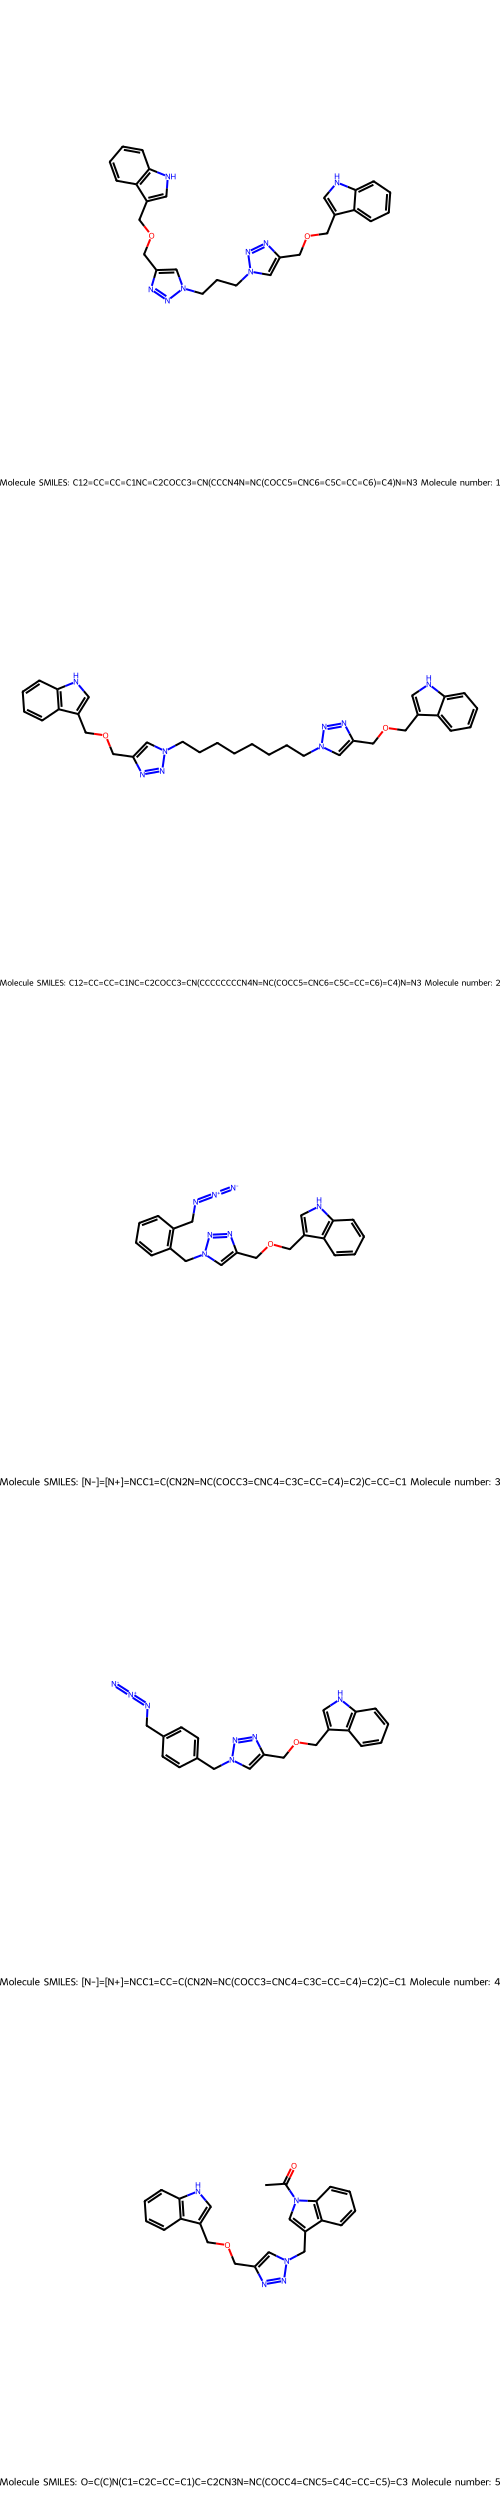

In [18]:
try:
    zx = get_visualization_of_SMILES(dat_list[0]['SMILES']) ## It depends on how many sheets are in the main excel file
    zx
except:
    print("There are no more sheets in the initial excel file...")
    zx = 0
zx

In [19]:
try:
    zx = get_visualization_of_SMILES(dat_list[1]['SMILES']) ## It depends on how many sheets are in the main excel file
    zx
except:
    print("There are no more sheets in the initial excel file...")
    zx = 0
zx

There are no more sheets in the initial excel file...


0

In [20]:
try:
    zx = get_visualization_of_SMILES(dat_list[2]['SMILES']) ## It depends on how many sheets are in the main excel file
    zx
except:
    print("There are no more sheets in the initial excel file...")
    zx = 0
zx

There are no more sheets in the initial excel file...


0

In [21]:
try:
    for df in dat_list:
        for i, smile in enumerate(df['SMILES']):
            create_PDB_from_SMILES(smile, directory, df['destenation'][i], df['Klasal'][i])

except:
    for i, smile in enumerate(dat_list[0]['SMILES']):
        create_PDB_from_SMILES(smile, directory, dat_list[0]['destenation'][i], 'ligand__'+str(i+1))
        

Correctly moved...
Correctly moved...
Correctly moved...
Correctly moved...
Correctly moved...


## load all the ligands

In [22]:
files = glob.glob("lig*")
print(files)

['ligand1_', 'ligand2_', 'ligand3_', 'ligand4_', 'ligand5_']


In [23]:
pdbs = []
for pdb in files:
    pdb = glob.glob(pdb+str('\\3D*'))
    pdbs.append(pdb)

In [24]:
pdbs

[['ligand1_\\3D_structure_ligand__1_C12=CC=CC=C1NC=C2COCC3=CN(CCCN.pdb'],
 ['ligand2_\\3D_structure_ligand__2_C12=CC=CC=C1NC=C2COCC3=CN(CCCC.pdb'],
 ['ligand3_\\3D_structure_ligand__3_[N-]=[N+]=NCC1=C(CN2N=NC(COCC3.pdb'],
 ['ligand4_\\3D_structure_ligand__4_[N-]=[N+]=NCC1=CC=C(CN2N=NC(CO.pdb'],
 ['ligand5_\\3D_structure_ligand__5_O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=.pdb']]

In [25]:
pdbs[1][0]

'ligand2_\\3D_structure_ligand__2_C12=CC=CC=C1NC=C2COCC3=CN(CCCC.pdb'

In [26]:
with open('Prepare_pdbqt_from_pdb.txt', 'w') as f:
    for line in pdbs:
        f.write('obabel ')
        f.write(str("'")+line[0]+str("'"))
        f.write(' -O ')
        f.write(line[0].split('\\')[0]+str('\\')+line[0].split('\\')[0]+str('.pdbqt'))
        f.write('\n')

## Run generated code in the command prompt in the direcotry where the file is created

## distribute protein - the receptor should be prepared before running below code in the *.pdbqt file (with polar H)

In [27]:
name_of_prepared_receptor = str(input('Please use the name given for your protein domain after preparation... (For example 5v5z_polar_H.pdbqt) : '))

Please use the name given for your protein domain after preparation... (For example 5v5z_polar_H.pdbqt) : 2q85_polar_H.pdbqt


In [28]:
to_be_moved_to = list_dir

In [29]:
to_be_moved_to[0].split("\\")[-1]

'ligand1_'

In [30]:
to_be_moved_to[0]

'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand1_'

## The initial config file should be prepared before running this code, exemplary one is in the repo

In [31]:
with open('config.txt') as f:
    lines = f.readlines()

In [32]:
lines

['receptor = 2q85_polar_H.pdbqt\n',
 'ligand = 3D_structure_publikacja_1_C12=CC=CC=C1NC=C2COCC3=CN(CCCN_pub1_lig_1.pdbqt\n',
 '\n',
 'center_x = 13.853\n',
 'center_y = 0.000\n',
 'center_z = 0.000\n',
 '\n',
 'size_x = 80\n',
 'size_y = 80\n',
 'size_z = 80\n',
 '\n',
 'out = blind_try_lig_1_pub_1.pdbqt\n',
 '\n',
 'exhaustiveness = 64\n']

In [33]:
run_multiple_mol_doc = True #it changes the config.txt file in order to conduct more MDs
if run_multiple_mol_doc == True:
    
    for folder in to_be_moved_to:
        shutil.copy(name_of_prepared_receptor, folder)
        shutil.copy('config.txt', folder)
        with open(str(folder+str('\\config.txt'))) as f:
            lines = f.readlines()
            lines[0] = str('receptor = '+folder.split("\\")[-1]+'\\'+'2q85_polar_H.pdbqt')
            lines[1] = str('ligand = '+folder.split("\\")[-1]+'\\'+folder.split("\\")[-1]+'.pdbqt')
            lines[11] = str('out = '+folder.split("\\")[-1]+'\\docking_result_'+folder.split("\\")[-1]+'.pdbqt')
        with open(str(folder+str('\\config.txt')), 'w') as f:
        
            for line in lines:
                f.write(line)
                f.write('\n')
else:
    for folder in to_be_moved_to:
        shutil.copy(name_of_prepared_receptor, folder)
        shutil.copy('config.txt', folder)
        with open(str(folder+str('\\config.txt'))) as f:
            lines = f.readlines()
            lines[1] = str('ligand = '+folder.split("\\")[-1]+'.pdbqt')
            lines[11] = str('out = docking_result_'+folder.split("\\")[-1]+'.pdbqt')
        with open(str(folder+str('\\config.txt')), 'w') as f:
        
            for line in lines:
                f.write(line)
                f.write('\n')
                
                
                
## Copy ligands to one directory
try:
    os.mkdir("Prepared_ligands")
except:
    pass
ligands_in_one_dir = False
if ligands_in_one_dir is not True:
    ligands_names = []
    for folder_name in to_be_moved_to:
        ligands_names.append(folder_name.split("\\")[-1]+str('\\')+folder_name.split("\\")[-1]+'.pdbqt')
    for directory, file in enumerate(ligands_names):
        shutil.copy(file, 'Prepared_ligands\\')
            
            
## Distribute ligands if prepared
pdbqt_lingands_prepared = True
if pdbqt_lingands_prepared == True:
    ligands_names = []
    for folder_name in to_be_moved_to:
        ligands_names.append(folder_name.split("\\")[-1]+'.pdbqt')
    for directory, ligand in enumerate(ligands_names):
        shutil.copy('Prepared_ligands\\'+str(ligand), to_be_moved_to[directory])

## prepare one file to be executed via prompt

In [34]:
with open('to_be_executed.txt', 'w') as f:
    for element in to_be_moved_to:
        f.write('vina --config ')
        f.write(str(element.split("\\")[-1]))
        f.write('\config.txt --log ')
        f.write(str(element.split("\\")[-1]))
        f.write('\MD_log_.txt &')
        f.write('\n')

# Run after molecular docking procedure is completed - after execution of "to_be_executed.txt" 

## load molecular docking results into table

In [35]:
import pandas as pd

In [36]:
to_be_moved_to = pd.read_excel('to_be_moved_to.xlsx')
to_be_moved_to = list(to_be_moved_to['Name'])

In [37]:
to_be_moved_to[0]

'C:\\Users\\aleks\\Documents\\GitHub\\Molecular_docking_Vina_CPU\\ligand1_'

In [39]:
with open(str(to_be_moved_to[0]+str('\\MD_log_.txt'))) as f:
    lines = f.readlines()

In [40]:
lines

['#################################################################\n',
 '# If you used AutoDock Vina in your work, please cite:          #\n',
 '#                                                               #\n',
 '# O. Trott, A. J. Olson,                                        #\n',
 '# AutoDock Vina: improving the speed and accuracy of docking    #\n',
 '# with a new scoring function, efficient optimization and       #\n',
 '# multithreading, Journal of Computational Chemistry 31 (2010)  #\n',
 '# 455-461                                                       #\n',
 '#                                                               #\n',
 '# DOI 10.1002/jcc.21334                                         #\n',
 '#                                                               #\n',
 '# Please see http://vina.scripps.edu for more information.      #\n',
 '#################################################################\n',
 '\n',
 'WARNING: The search space volume > 27000 Angstrom^3 (Se

In [41]:
lines[-10]

'   1        -11.0      0.000      0.000\n'

In [42]:
lines[-10][12:18]

'-11.0 '

In [43]:
affinities = []
for element in lines[-10:-1]:
    affinities.append(element[12:18])

In [44]:
affinities

['-11.0 ',
 '-10.0 ',
 ' -9.8 ',
 ' -9.5 ',
 ' -9.5 ',
 ' -9.4 ',
 ' -9.4 ',
 ' -9.4 ',
 ' -9.3 ']

In [45]:
float(affinities[0])

-11.0

In [46]:
floats = [float(x) for x in affinities]

## construct dataframe

In [47]:
df = pd.DataFrame(data=floats, columns=[str(to_be_moved_to[0].split("\\")[-1])])

In [48]:
df

,ligand1_
0,-11.0
1,-10.0
2,-9.8
3,-9.5
4,-9.5
5,-9.4
6,-9.4
7,-9.4
8,-9.3


In [ ]:
to_be_moved_to__ = to_be_moved_to.copy()
for i, directory in enumerate(to_be_moved_to):
    
    with open(str(directory+str('\\MD_log_.txt'))) as f:
        lines = f.readlines()
    
    affinities = []
    for element in lines[-10:-1]:
        affinities.append(element[12:18])
    
    floats = [float(x) for x in affinities]
    
    to_be_moved_to__[i] = pd.DataFrame(data=floats, columns=[str(directory.split("\\")[-1])])

In [ ]:
to_be_moved_to__[0]

In [ ]:
concat = pd.concat(to_be_moved_to__, axis=1)

In [ ]:
concat

In [ ]:
concat.to_excel('docking_results_'+str(input("Name of protein domain..."))+str('.xlsx'))

In [ ]:
to_be_moved_to__[0].to_excel('docking_results_'+str(input("Name of protein domain..."))+str('.xlsx'))